In [1]:
import numpy as np
from scipy.misc import factorial
import pylab as pl

### Define input space

In [2]:
# maps inputs to an index, such tha each input has a unique index
class input_space:
    
    def __init__(self):
        self.w2i = {}
        self.i2w = []
    
    def append(self,f):
        if f in self.w2i:
            ind = self.w2i[f]
        else:
            ind = len(self.i2w)
            self.w2i[f] = ind
            self.i2w.append(f)
        
i_s = input_space()
input = {'names': ['a', 'b', 'c']}
for i in range(len(input['names'])):
    i_s.append(input['names'][i])
    
input['values'] = np.zeros(len(input['names']), dtype=int)
print input

print i_s.i2w
print i_s.w2i

{'values': array([0, 0, 0]), 'names': ['a', 'b', 'c']}
['a', 'b', 'c']
{'a': 0, 'c': 2, 'b': 1}


### Create neuron class

In [3]:
class Neuron:
    
    def __init__(self, name, value):
        self.name = name
        self.value = value
        
    def leaky_integrator(self, s):
        self.s = s
        
    def gate(self, n1, n2):
        self.n1 = n1
        
    #def weighted_sum(self):
        

### Create program class

In [4]:
class Program:
    
    def __init__(self, sequence=[]):
        self.sequence = sequence
        
    #def run(self):
    #    self.M = 

In [13]:
scan = Program(sequence={'names': ['current_item', 'gate'], 'order': [0, 1]})

In [14]:
#scan_wm = Program(sequence={'names': ['load', 'internal_time', 'c']})

In [15]:
print scan.sequence

{'names': ['current_item', 'gate'], 'order': [0, 1]}


In [ ]:
scan.run(current_item)

In [59]:
class dms(Program):

        def connect(self):
            self.M = np.zeros((len(self.sequence['names'])+1, max(self.sequence['order'])+1))
            for i in range(len(self.sequence['names'])):
                self.M[i_s.w2i[self.sequence['names'][i]], self.sequence['order'][i]] = 1
            
        #def run(self):
            

sequence={'names':['attend_to_change', 
              'store', 
              'attend_to_change', 
              'wait', 
              'store', 
              'diff', 
              'move_arm_up', 
              'move_arm_dow',
              'lick'],
              'order': [0, 1, 2, 3, 4, 5, 6, 7, 7, 8]}

for i in range(len(sequence['names'])):
    i_s.append(sequence['names'][i])

dms_object = dms(sequence=sequence)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
['a', 'b', 'c', 'attend_to_change', 'store', 'wait', 'diff', 'move_arm_up', 'move_arm_dow', 'lick']
{'a': 0, 'c': 2, 'b': 1, 'move_arm_dow': 8, 'attend_to_change': 3, 'diff': 6, 'move_arm_up': 7, 'lick': 9, 'store': 4, 'wait': 5}
{'names': ['attend_to_change', 'store', 'attend_to_change', 'wait', 'store', 'diff', 'move_arm_up', 'move_arm_dow', 'lick'], 'order': [0, 1, 2, 3, 4, 5, 6, 7, 7, 8]}
['attend_to_change', 'store', 'attend_to_change', 'wait', 'store', 'diff', 'move_arm_up', 'move_arm_dow', 'lick']
store
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]]


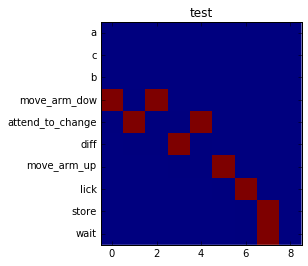

In [65]:
print range(len(sequence['names']))

print i_s.i2w
print i_s.w2i

i_s.w2i[sequence['names'][8]]
sequence['order'][8]


print dms_object.sequence
print dms_object.sequence['names']
print dms_object.sequence['names'][1]
range(len(dms_object.sequence['names']))

dms_object.connect()
print dms_object.M

%matplotlib inline
pl.imshow(dms_object.M, interpolation='none')

pl.gca().set_yticks(np.arange(len(i_s.w2i.keys())))
_ = pl.gca().set_yticklabels(i_s.w2i.keys())
_ = pl.gca().set_title('test')

In [64]:
print i_s.w2i.keys()

['a', 'c', 'b', 'move_arm_dow', 'attend_to_change', 'diff', 'move_arm_up', 'lick', 'store', 'wait']


### Create supported dimension

In [5]:
class Support:
    
    def __init__(self, name, tstr_min=1, tstr_max=10, buff_len=30, k=8, dtime = 0.001, len_time=10):
        self.name = name
        self.tstr_min = tstr_min
        self.tstr_max = tstr_max
        self.buff_len = buff_len
        self.k = k
        self.dtime = dtime
        self.len_time = len_time
        
        self.N = self.buff_len+2*self.k
        self.Nt = int(self.len_time/self.dtime)

        #Create power-law growing Taustarlist and corresponding s
        alpha = (self.tstr_max/self.tstr_min)**(1./buff_len)-1
        pow_vec = np.arange(-self.k,buff_len + self.k) #-1
        self._Taustarlist = self.tstr_min * (1 + alpha)**pow_vec

        s = self.k/self._Taustarlist
        
        #Create DerivMatrix
        self._DerivMatrix = np.zeros((self.N,self.N))
        for i in range(1,self.N-1):
            self._DerivMatrix[i, i-1] = -(s[i+1]-s[i])/(s[i]-s[i-1])/(s[i+1] - s[i-1])
            self._DerivMatrix[i, i] = ((s[i+1]-s[i])/(s[i]- s[i-1])-(s[i]-s[i-1])/(s[i+1]-s[i]))/(s[i+1] - s[i-1])
            self._DerivMatrix[i, i+1] = (s[i]-s[i-1])/(s[i+1]-s[i])/(s[i+1] - s[i-1])

        self.t = np.zeros((self.N,self.Nt))
        self.T = np.zeros((self.N,self.Nt))
        self._s = s
        
    def update(self, time_index, f):
        time_index = time_index + 1
        self.t[:,time_index] = self.t[:,time_index-1]+((-self._s.T*self.t[:,time_index-1]+f[time_index])*self.dtime)
        t_diff = np.dot(np.linalg.matrix_power(self._DerivMatrix, self.k), self.t[:,time_index])
        L1 = (-1)**self.k*self._s**(self.k+1) # this can be taken out
        L2 = t_diff/factorial(self.k)
        self.T[:,time_index] = L1.T*L2.T
                

Test that scale-invaraint memory (big T) works properly

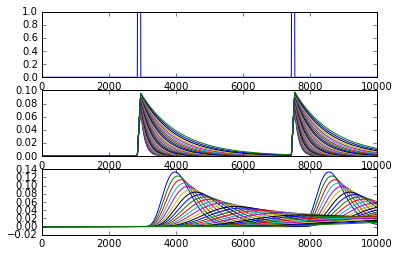

In [6]:
tmp = Support(name='neuron1')
f = np.concatenate((np.zeros(2850), np.ones(100), np.zeros(4500), np.ones(100), np.zeros(2450)))
for time in range(9999):
    tmp.update(time,f)
%matplotlib inline
pl.subplot(311)
_ = pl.plot(f.T)
pl.subplot(312)
_ = pl.plot(tmp.t[tmp.k:-tmp.k,:].T)
pl.subplot(313)
_ = pl.plot(tmp.T[tmp.k:-tmp.k,:].T)

In [7]:
scan_wm = Program()